In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

Multiple Linear Regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables

### PROFILING

DATA 50 STARTUP

In [2]:
df3 = pd.read_csv('50_Startups.csv')

In [3]:
df3.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df3.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### DATA CLEANSING

No need

### EXPLORATORY DATA ANALYSIS

In [6]:
df3.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


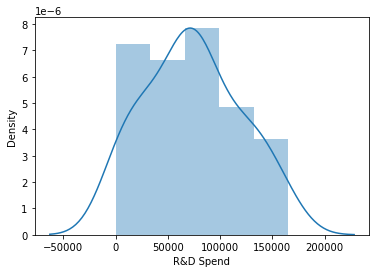

In [7]:
sns.distplot(df3['R&D Spend']);

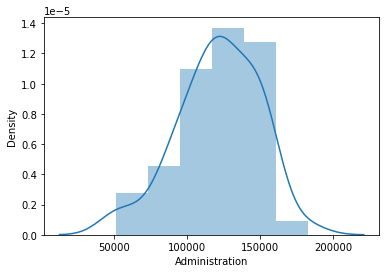

In [8]:
sns.distplot(df3['Administration']);

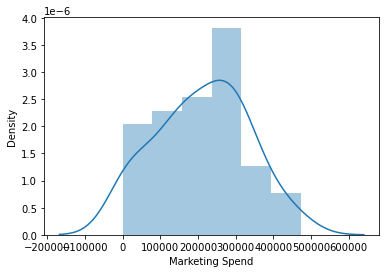

In [9]:
sns.distplot(df3['Marketing Spend']);

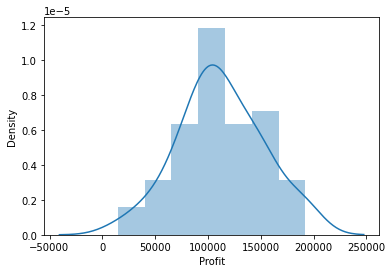

In [10]:
sns.distplot(df3['Profit']);

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


<AxesSubplot:>

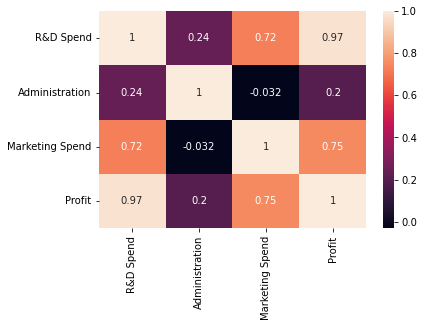

In [11]:
print(df3.corr())
sns.heatmap(df3.corr(), annot=True)

In [ ]:
# multikolinear
# R&D and profit
# R&D and Marketing Spend

### FEATURE ENGINEERING

- One Hot Encoding

In [12]:
df3['State'].value_counts() 

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [13]:
state_enc = pd.get_dummies(df3['State'], prefix = 'State')
df3.drop(['State'], axis=1, inplace = True)
df3 = pd.concat([df3, state_enc], axis=1)

In [14]:
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


- StandarScaler

In [15]:
scaler = StandardScaler()
df3[['R&D Spend']] = scaler.fit_transform(df3[['R&D Spend']])
df3[['Administration']] = scaler.fit_transform(df3[['Administration']])
df3[['Marketing Spend']] = scaler.fit_transform(df3[['Marketing Spend']])
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,2.016411,0.560753,2.153943,192261.83,0,0,1
1,1.955860,1.082807,1.923600,191792.06,1,0,0
2,1.754364,-0.728257,1.626528,191050.39,0,1,0
3,1.554784,-0.096365,1.422210,182901.99,0,0,1
4,1.504937,-1.079919,1.281528,166187.94,0,1,0


### PREPROCESSING MODELLING

- Feature Selection

In [16]:
df3.drop(['Marketing Spend'], axis=1,inplace = True) # drop column multikolinear

- Feature Importance

In [17]:
x = df3.drop(['Profit'], axis=1)
y = df3['Profit']

In [18]:
x

,R&D Spend,Administration,State_California,State_Florida,State_New York
0,2.016411,0.560753,0,0,1
1,1.955860,1.082807,1,0,0
2,1.754364,-0.728257,0,1,0
3,1.554784,-0.096365,0,0,1
4,1.504937,-1.079919,0,1,0
5,1.279800,-0.776239,0,0,1
6,1.340066,0.932147,1,0,0
7,1.245057,0.871980,0,1,0
8,1.030369,0.986952,0,0,1
9,1.091819,-0.456640,1,0,0


- Splitting trainind and tes set

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.33, random_state = 42)

In [22]:
# define the model

model = LinearRegression()

In [23]:
# fit the model

model.fit(x_train,y_train)

LinearRegression()

In [24]:
# get importance

importance = model.coef_

In [25]:
# summerize feature importance

for i, v in enumerate(importance):
      print('Features: %0d, Score : %.5f'%(i,v))

Features: 0, Score : 42344.87878
Features: 1, Score : -5874.03978
Features: 2, Score : -4783.29930
Features: 3, Score : -1357.67756
Features: 4, Score : 6140.97686


In [ ]:
# feature 1,2,3 are not significant, they are Administration, State_California and State_Florida

<function matplotlib.pyplot.show(close=None, block=None)>

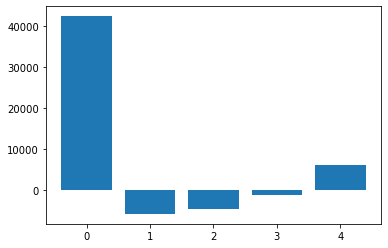

In [26]:
# plot feature importance

plt.bar([x for x in range (len(importance))], importance)
plt.show

### MULTILINEAR REGRESSION

- Fitting into training

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
regressor.coef_

array([42344.87877712, -5874.03977557, -4783.29930065, -1357.67756169,
        6140.97686234])

- Predict the result

In [30]:
y_pred = regressor.predict(x_test)

- Plot the result

In [31]:
result = pd.DataFrame({'Actual' : y_test, 'Predict': y_pred})

In [32]:
result

,Actual,Predict
13,134307.35,121373.537694
39,81005.76,82701.603569
30,99937.59,101049.786606
45,64926.08,49907.286306
17,125370.37,132751.617918
48,35673.41,64815.460563
26,105733.54,107440.986771
25,107404.34,95048.349208
32,97427.84,96066.527883
19,122776.86,123288.694569


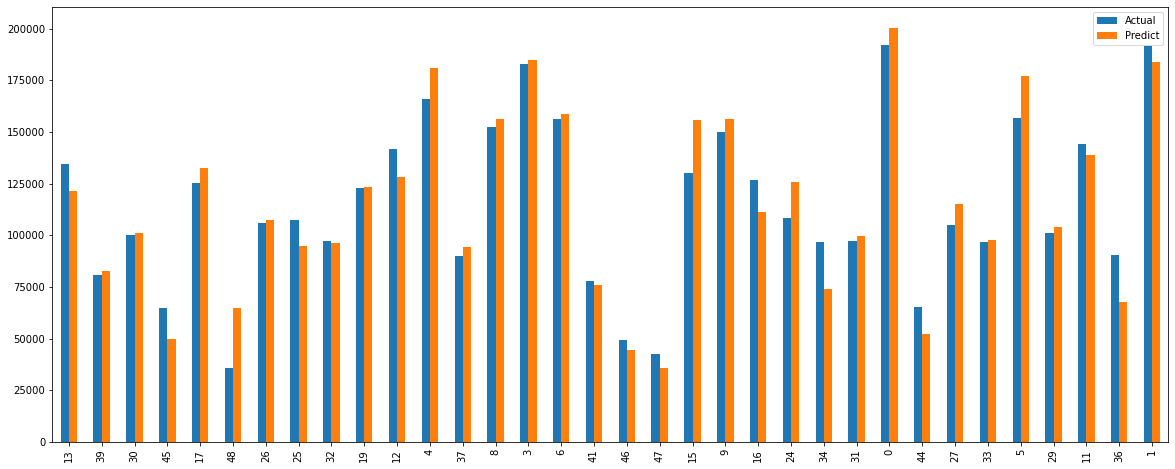

In [33]:
result.plot(kind = 'bar', figsize = (20,8))
plt.show()

### EVALUATE MODEL

In [34]:
mean_absolute_percentage_error(y_test, y_pred)

0.10547349915484146

In [35]:
mean_absolute_percentage_error(y_test, y_pred)

0.10547349915484146

## DROP FEATURE THAT ARE NOT SIGNIFICANT

From summerize feature importance, we knew that feature 1,2,3 are not significant, they are Administration, State_California and State_Florida

so, we need to drop those column

In [44]:
df3.drop(['State_California', 'State_Florida','Administration'], axis=1,inplace = True)

### Remodelling

- Feature importance

In [45]:
x = df3.drop(['Profit'], axis=1)
y = df3['Profit']

- Splitting training and test set

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.33, random_state = 42)

In [47]:
# define model and fit model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

- Fitting into training

In [49]:
regressor = LinearRegression()

In [50]:
regressor.fit(x_train, y_train)

LinearRegression()

In [51]:
regressor.coef_

array([41896.12902424, 11590.92074071])

- Predict the result

In [52]:
y_pred = regressor.predict(x_test)

- Plot the result

In [53]:
result = pd.DataFrame({'Actual' : y_test, 'Predict': y_pred})

In [54]:
result

,Actual,Predict
13,134307.35,126008.757844
39,81005.76,76743.185110
30,99937.59,98350.945666
45,64926.08,53705.698273
17,125370.37,140056.573354
48,35673.41,53283.260297
26,105733.54,110645.137299
25,107404.34,100812.874508
32,97427.84,99654.991728
19,122776.86,132461.706861


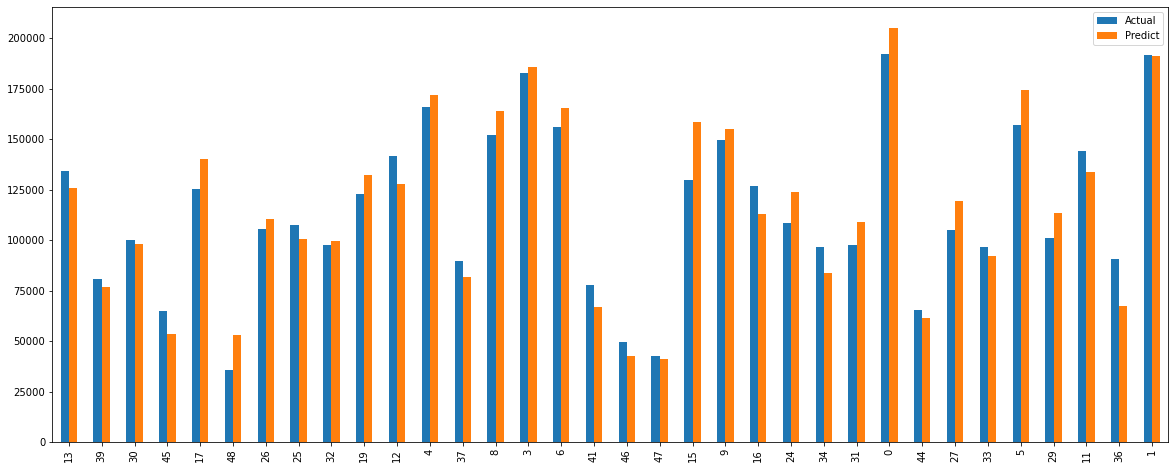

In [55]:
result.plot(kind = 'bar', figsize = (20,8))
plt.show()

### EVALUATE MODEL

In [56]:
mean_absolute_error(y_test, y_pred)

9950.452877253336

In [57]:
mean_absolute_percentage_error(y_test, y_pred)

0.10101521224891363

In [59]:
mape = 0.10547349915484146
mape_new = 0.10101521224891363

mape-mape_new 

0.004458286905927825